# Linear Regression and Multiple Linear Regression

## Linear Regression

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Let's look at our data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data = pd.read_csv("deneme.csv")
data = data.drop(["Player2", "FSP.2", "FSW.2", "SSP.2", "SSW.2", "ACE.2","DBF.2", "WNR.2", "UFE.2","BPC.2","BPW.2","TPW.2" ,
                  "FNL1", "FNL2","NPA.1","NPW.1","ST1.1","ST2.1","ST3.1","ST4.1","ST5.1","NPA.2","NPW.2","ST1.2","ST2.2","ST3.2",
                  "ST4.2","ST5.2"], axis=1)
data.rename(columns={"Player1":"Player", "FSP.1":"FSP" , "FSW.1" : "FSW" , "SSP.1" : "SSP" , "SSW.1" : "SSW","ACE.1" : "ACE", 
                     "DBF.1" : "DBF", "WNR.1":"WNR", "UFE.1" : "UFE", "BPC.1" : "BPC" , "BPW.1" : "BPW","TPW.1" : "TPW" },
            inplace=True)
data.head(10)


,Player,Round,Result,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,TPW
0,Lukas Lacko,1,0,61,35,39,18,5,1.0,17,29,1,3,70
1,Leonardo Mayer,1,1,61,31,39,13,13,1.0,13,1,7,14,80
2,Marcos Baghdatis,1,0,52,53,48,20,8,4.0,37,50,1,9,106
3,Dmitry Tursunov,1,1,53,39,47,24,8,6.0,8,6,6,9,104
4,Juan Monaco,1,0,76,63,24,12,0,4.0,16,35,3,12,128
5,Santiago Giraldo,1,0,65,51,35,22,9,3.0,35,41,2,7,108
6,Dudi Sela,1,0,68,73,32,24,5,3.0,41,50,9,17,173
7,Fabio Fognini,1,1,47,18,53,15,3,4.0,21,31,6,20,78
8,David Guez,1,0,64,26,36,12,3,NaN,20,39,3,7,67
9,Nikolay Davydenko,1,1,77,76,23,11,6,4.0,6,4,7,24,162


Some scatterplots as subplots:

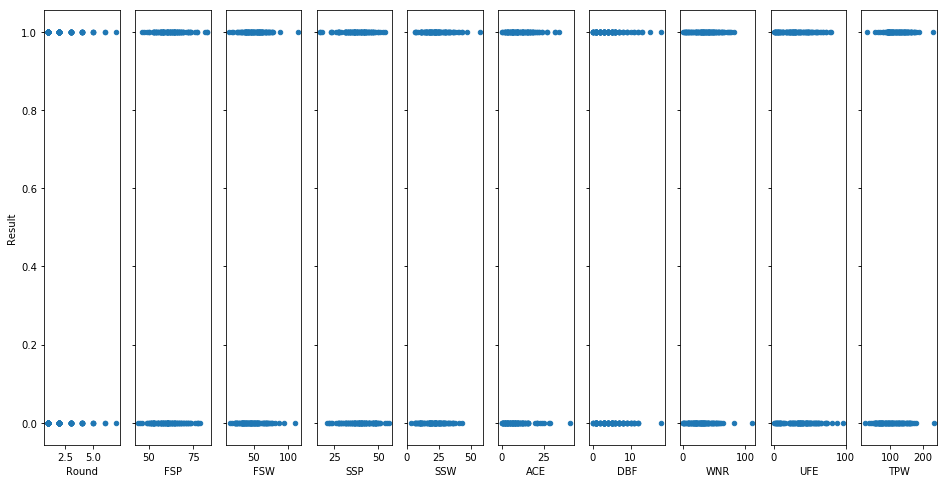

In [17]:
fig, axs = plt.subplots(1, 10, sharey=True)

data.plot(kind='scatter', x='Round',y='Result',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter', x='FSP',y='Result',ax=axs[1])
data.plot(kind='scatter', x='FSW',y='Result',ax=axs[2])
data.plot(kind='scatter', x='SSP',y='Result',ax=axs[3])
data.plot(kind='scatter', x='SSW',y='Result',ax=axs[4])
data.plot(kind='scatter', x='ACE',y='Result',ax=axs[5])
data.plot(kind='scatter', x='DBF',y='Result',ax=axs[6])
data.plot(kind='scatter', x='WNR',y='Result',ax=axs[7])
data.plot(kind='scatter', x='UFE',y='Result',ax=axs[8])
data.plot(kind='scatter', x='TPW',y='Result',ax=axs[9])


Our scatterplots are not very useful, since the result can be either 1 and 0.
Maybe "Break Points Created" can be used since it seems like winning player has created more break points compared to losing player.

Let's create a fitted line y = a + bx and see the coefficients

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Result ~ BPC', data=data).fit()

lm.params

Intercept    0.037116
BPC          0.128324
dtype: float64

So our line is y = 0.128324x + 0.037116

Let's make a dataframe for the smallest and largest observed values of Break Points Created

In [19]:
X_new = pd.DataFrame({'BPC': [data.BPC.min(), data.BPC.max()]})
X_new.head()

,BPC
0,0
1,11


So the minimum number of break points created is 0 and the maximum number is 11, let's make predictions about it.


In [20]:
preds = lm.predict(X_new)
preds

array([ 0.0371164 ,  1.44868224])

The least squared line:

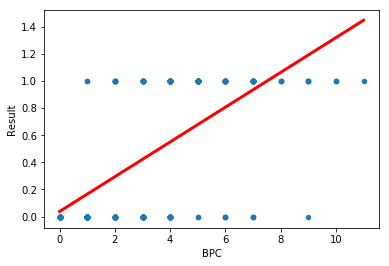

In [21]:
data.plot(kind='scatter', x='BPC', y='Result')
plt.plot(X_new, preds, c='red', linewidth=3)

The confidence interval:

In [22]:
lm.conf_int()

,0,1
Intercept,-0.049556,0.123788
BPC,0.108422,0.148227


Alternatively, we can check the p-value

In [23]:
lm.pvalues

Intercept    3.998009e-01
BPC          7.622144e-29
dtype: float64

Supportingly, the p-value of BPC is less than 0.05, so we can say that BPC has a relation between Result with %95 confidence

In [24]:
lm.rsquared

0.39210162237088886

Our rsquared value is very very low, so the regression line is not a good fit for our model, let's try multiple regression

## Multiple Linear Regression

First, let's try to include all of the statistics of the player

In [25]:
lm = smf.ols(formula='Result ~ FSP + FSW + SSP + SSW + ACE  + WNR + UFE +BPC + BPW + TPW', data=data).fit()
lm.params

Intercept    0.000022
FSP          0.005698
FSW          0.003548
SSP         -0.003473
SSW          0.014097
ACE          0.001570
WNR          0.014973
UFE         -0.011098
BPC          0.144904
BPW          0.006208
TPW         -0.008232
dtype: float64

Our Multiple Regression is this:
y = 0.000022 + 0.005698*FSP + 0.003548*FSW - 0.003473*SSP + 0.014097*SSW + 0.001570*ACE + 0.014973*WNR - 0.011098*UFE + 0.144904*BPC + 0.006208*BPW - 0.008232*TPW

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Result   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     34.23
Date:                Wed, 10 May 2017   Prob (F-statistic):           1.71e-38
Time:                        21:08:42   Log-Likelihood:                -79.442
No. Observations:                 252   AIC:                             178.9
Df Residuals:                     242   BIC:                             214.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.225e-05   1.93e-05      1.153      0.250     -1.57e-05  6.02e-05
FSP            0.0057      0.002      2.598      0.010         0.001     0.010
FSW            0.0035      0.006      0.592      0.555        -0.008     0.015
SSP           -0.0035      0.003     -1.039      0.300        -0.010     0.003
SSW            0.0141      0.007      1.989      0.048         0.000     0.028
ACE            0.0016      0.005      0.331      0.741        -0.008     0.011
WNR            0.0150      0.002      6.452      0.000         0.010     0.020
UFE           -0.0111      0.002     -6.382      0.000        -0.015    -0.008
BPC            0.1449      0.017      8.762      0.000         0.112     0.177
BPW            0.0062      0.008      0.764      0.445        -0.010     0.022
TPW           -0.0082      0.004     -2.125      0.035        -0.016    -0.001
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.405
Skew:                          -0.016   Prob(JB):                        0.817
Kurtosis:                       2.806   Cond. No.                     1.39e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our R-squared is very low, this model did not work out very well for our data.